Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA

In [2]:
cocacola=pd.read_excel('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola.shape

(42, 2)

In [4]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
cocacola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
cocacola.duplicated().sum()

0

Visualisations

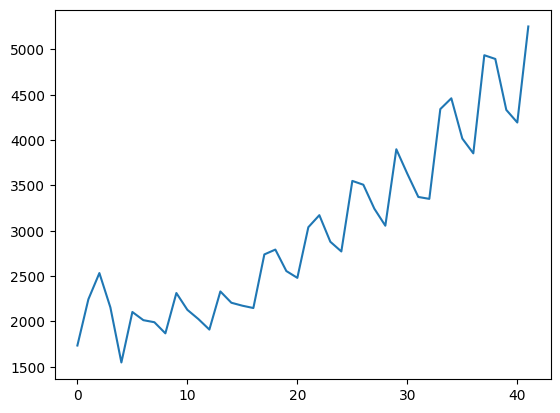

In [7]:
cocacola.Sales.plot()
plt.show()

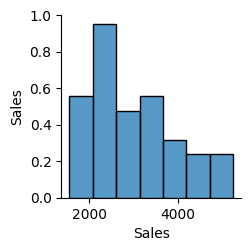

In [8]:
sns.pairplot(cocacola)
plt.show()

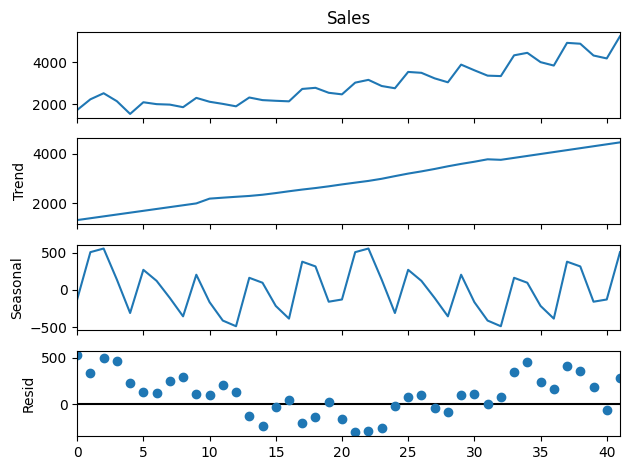

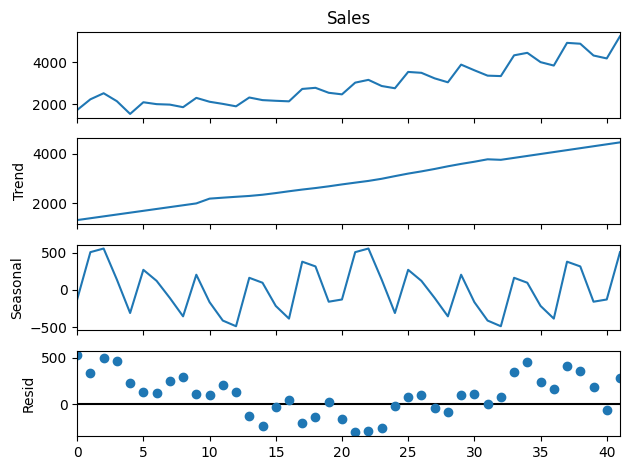

In [9]:
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_ts_add=smf.tsa.seasonal_decompose(cocacola['Sales'],extrapolate_trend="freq",period=20)
seasonal_ts_add.plot()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


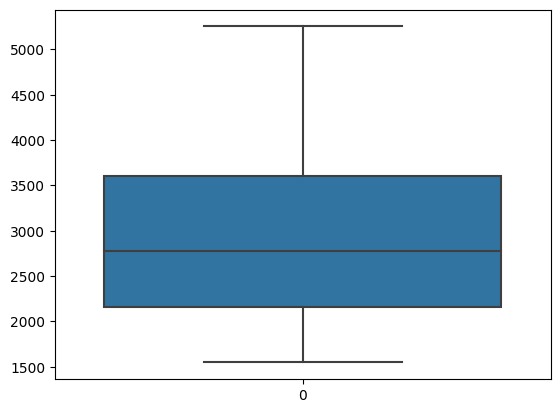

In [10]:
import seaborn as sns
sns.boxplot(data=cocacola["Sales"])
quarter=["Q1","Q2","Q3","Q4"]
p=cocacola["Quarter"][0]
p[0:2]
cocacola["quarter"]=0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['quarter'][i]= p[0:2]
cocacola.head()

Dummies

In [11]:
quarter_dummies=pd.DataFrame(pd.get_dummies(cocacola["quarter"]))
quarter_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [12]:
df1=pd.concat([cocacola,quarter_dummies],axis=1)
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [13]:
df1["t"]=np.arange(1,43)
df1["t_squared"]=df1["t"]*df1["t"]
df1["log_Sales"]=np.log(df1["Sales"])
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


Splitting Data

In [14]:
Train=df1.head(32)
Test=df1.tail(10)

Model Building

Linear Model

In [15]:
import statsmodels.formula.api as smf
linear_model=smf.ols("Sales~t",data=Train).fit()

In [16]:
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
pred_linear

32    3504.086233
33    3560.913734
34    3617.741235
35    3674.568736
36    3731.396237
37    3788.223738
38    3845.051239
39    3901.878740
40    3958.706241
41    4015.533742
dtype: float64

In [17]:
rmse_linear=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2))
rmse_linear

752.9233932767116

Exponential Model

In [18]:
Exp =smf.ols("log_Sales~t",data=Train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(Test["t"])))
pred_Exp

32    8.182657
33    8.204457
34    8.226258
35    8.248059
36    8.269860
37    8.291660
38    8.313461
39    8.335262
40    8.357062
41    8.378863
dtype: float64

In [19]:
rmse_Exp=np.sqrt(np.mean((np.array(Test["Sales"]-np.array(np.exp(pred_Exp)))**2)))
rmse_Exp

590.3316432076487

Quadratic Model

In [20]:
Quad=smf.ols("Sales~t+t_squared",data=Train).fit()
pred_Quad=pd.Series(Quad.predict(Test[["t","t_squared"]]))
pred_Quad

32    3899.007943
33    4027.639391
34    4160.494601
35    4297.573572
36    4438.876305
37    4584.402800
38    4734.153056
39    4888.127074
40    5046.324854
41    5208.746395
dtype: float64

In [21]:
rmse_Quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_Quad))**2))
rmse_Quad

457.735735540752

Additive Seasonality

In [22]:
add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test))
rmse_add_sea=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_sea))**2))
print("RMSE Addditive Seasonality: ",rmse_add_sea)

RMSE Addditive Seasonality:  1850.466546185835


Additive Seaonality with Quadratic Trend

In [23]:
add_sea_quad=smf.ols("Sales~t+t_squared+Q1+Q2+Q3+Q4",data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(Test))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_sea_quad))**2))
print("RMSE Addditive Seasonality: ",rmse_add_sea_quad)

RMSE Addditive Seasonality:  277.35107711285275


Multiplicative Seaonality




In [24]:
mul_sea=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(Test))
rmse_mul_sea=np.sqrt(np.mean((np.array(Test['Sales'])-
                                  np.array(np.exp(pred_mul_sea)))**2))
print("RMSE Multiplicative Seasonality: ",rmse_mul_sea)

RMSE Multiplicative Seasonality:  448.86781826918656


Table of Rmse values

In [25]:
# Creating table of RMSE values
data1 = {"MODEL":pd.Series(["RMSE Linear","RMSE Exponential","RMSE Quadratic","RMSE Additive Seasonality","RMSE Additive Seasonality Quadratic","RMSE Multiplicative Seasonality"]),
         "RMSE Value":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}

table_rmse =pd.DataFrame(data1)
table_rmse

,MODEL,RMSE Value
0,RMSE Linear,752.923393
1,RMSE Exponential,590.331643
2,RMSE Quadratic,457.735736
3,RMSE Additive Seasonality,1850.466546
4,RMSE Additive Seasonality Quadratic,277.351077
5,RMSE Multiplicative Seasonality,448.867818


Predictions

In [26]:
#Creating new data to predict
data=[["Q3_96","Q3"],["Q4_96","Q4"],["Q1_97","Q1"],["Q2_97","Q2"]]
print(data)
forecast=pd.DataFrame(data,columns=['Quarter','quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [27]:
# creating dummies,t and t-squared values
dummies=pd.DataFrame(pd.get_dummies(forecast['quarter']))
#create dummies and T and T-Squared columns
forecast1=pd.concat([forecast,dummies],axis=1)
forecast1["t"]=np.arange(1,5)
forecast1["t_squared"]=forecast1["t"]*forecast1["t"]
print('\nAfter Dummy,T and T-Square\n\n',forecast1.head())


After Dummy,T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


In [28]:
# forecasting Additive Seasonality Quadratic
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=df1).fit()        # Forecasting using Additive Seasonality Quadratic Model
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new
forecast1["forecasted_sales"] = pd.Series(pred_new)

In [29]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] # Final Prediction for next 4 Quarters
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
